#Predicting heart disease
Using [Heart Disease Dataset from Kaggle](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)


##Model choises
We'll use different classification algorithms and comparing the result.
* Logistic Regression
* k-Nearest Neighbors
* Random Forest
* Decision Trees
* Naive Bayes
* Gradient Boosting

# importing libraries

In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [ ]:
!pip install seaborn

In [6]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/52/2d/ad6928a578c78bb0e44e34a5a922818b14c56716b81d145924f1f291416f/scikit_learn-1.3.2-cp38-cp38-win_amd64.whl.metadata
     ---------------------------------------- 0.0/42.2 MB ? eta -:--:--
     ---------------------------------------- 0.1/42.2 MB 1.7 MB/s eta 0:00:25
     ---------------------------------------- 0.4/42.2 MB 3.7 MB/s eta 0:00:12
      --------------------------------------- 1.0/42.2 MB 6.9 MB/s eta 0:00:06
     -- ------------------------------------- 2.3/42.2 MB 12.4 MB/s eta 0:00:04
     --- ------------------------------------ 3.8/42.2 MB 16.1 MB/s eta 0:00:03
     ----- ---------------------------------- 6.0/42.2 MB 21.3 MB/s eta 0:00:02
     ------- -------------------------------- 7.5/42.2 MB 23.9 MB/s eta 0:00:02
     ------- -------------------------------- 8.4/42.2 MB 22.3 MB/s eta 0:00:02
     ----------- --------------------------- 12.6/42.2 MB 46.7 MB/s eta 0:0


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os.path
from matplotlib.pyplot import figure
import seaborn as sns

In [10]:
%matplotlib inline

<!-- %matplotlib inline -->

In [11]:
## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

### Loading data

In [41]:
heart_disease_data = pd.read_csv("heart-disease-asi/dataset/heart.csv")

In [42]:
heart_disease_data.shape

(1025, 14)

### Exploring data

In [13]:
heart_disease_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [14]:
heart_disease_data.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [15]:
heart_disease_data.target.value_counts(normalize=True)

target
1    0.513171
0    0.486829
Name: proportion, dtype: float64

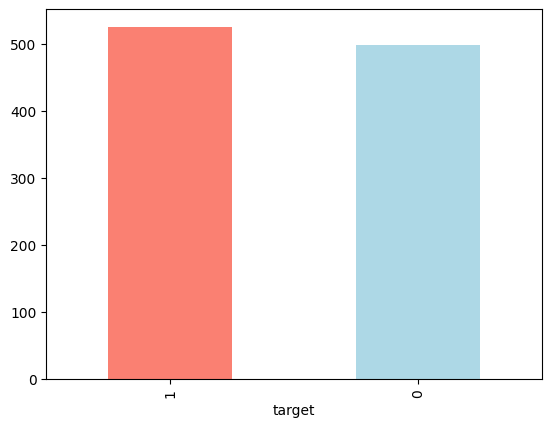

In [16]:
heart_disease_data.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [17]:
heart_disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [18]:
heart_disease_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


###Heart Disease Frequency according to Gender

In [19]:
heart_disease_data.sex.value_counts()

sex
1    713
0    312
Name: count, dtype: int64

C:\Users\Daria\AppData\Local\Temp\ipykernel_17144\2129276010.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target", y="age", data=heart_disease_data, palette="winter")


<Axes: xlabel='age', ylabel='Agagee'>

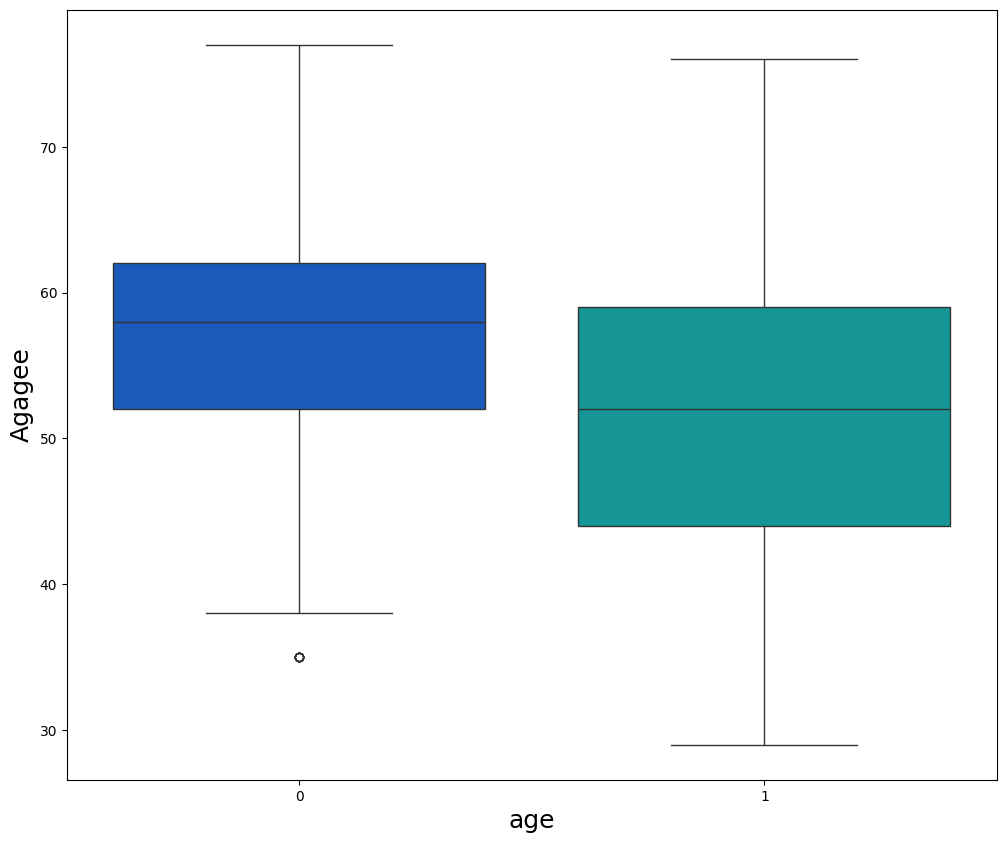

In [20]:
plt.figure(figsize=(12, 10))
plt.xlabel("age", fontsize=18)
plt.ylabel("Agagee", fontsize=18)
sns.boxplot(x="target", y="age", data=heart_disease_data, palette="winter")

There are 713 males and 312 females.

In [21]:
# Compare target column with sex column
pd.crosstab(heart_disease_data.target, heart_disease_data.sex)

sex,0,1
target,,
0,86,413
1,226,300


Let's make a simple heuristic.

Since there are around 300 women and 226 of them have a postive value of heart disease being present, we might infer, based on this one variable if the participant is a woman, there's a 72.5% chance she has heart disease.

As for males, there's about 700 total with 300 indicating a presence of heart disease. So we might predict, if the participant is male, 43% of the time he will have heart disease.

Averaging these two values, we can assume, based on no other parameters, if there's a person, there's a 54% chance they have heart disease.

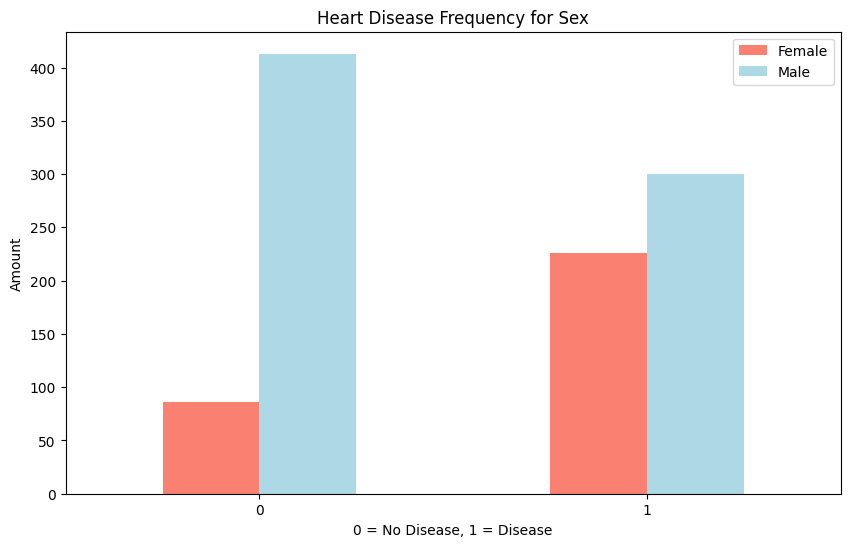

In [11]:
# Create a plot
pd.crosstab(heart_disease_data.target, heart_disease_data.sex).plot(
    kind="bar", figsize=(10, 6), color=["salmon", "lightblue"]
)

# Add some attributes to it
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

## Modeling

In [45]:
X = heart_disease_data.drop("target", axis=1)
y = heart_disease_data.target.values

In [24]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
len(X_train), len(X_test)

(820, 205)

### Model choises

1. Logistic Regression

In [31]:
# put models in dictionary
models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
}

In [29]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """

    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [40]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

{'KNN': 0.7317073170731707,
 'Logistic Regression': 0.7951219512195122,
 'Random Forest': 0.9853658536585366,
 'Naive Bayes': 0.8}

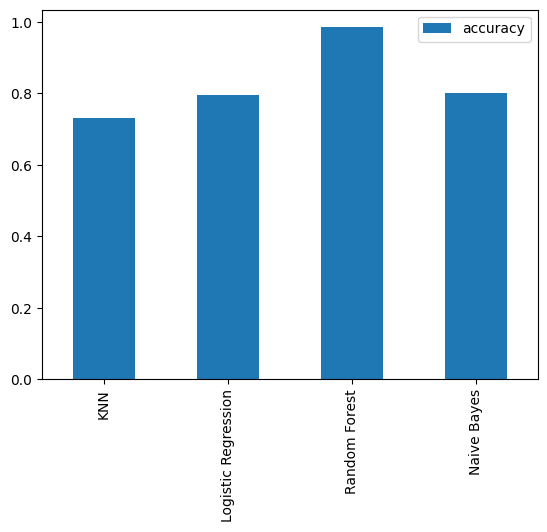

In [18]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

As we can see the `Random Forest` model performs best.

##Tuning models
###Tune KNeighborsClassifier

In [34]:
train_scores = []
test_scores = []

neighbors = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)

    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 98.54%


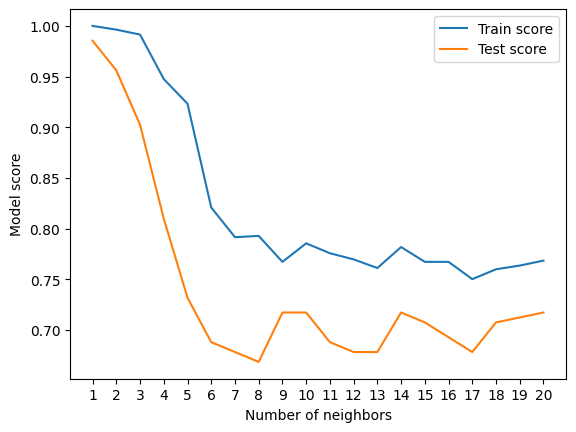

In [35]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Looking at the graph, n_neighbors = 1 seems best and got the same result as Logistic Regression.
It's accuracy rise from 73% to 98.5%

In [ ]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20), "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
}

In [38]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=log_reg_grid,
    cv=5,
    n_iter=20,
    verbose=True,
)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [43]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [ ]:
rs_log_reg.score(X_test, y_test)

0.7853658536585366

In [36]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(
    RandomForestClassifier(), param_distributions=rf_grid, cv=5, n_iter=20, verbose=True
)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

NameError: name 'rf_grid' is not defined

In [ ]:
# Find the best parameters
rs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 14,
 'n_estimators': 510}

In [ ]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.926829268292683

In [ ]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20), "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(
    LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True
)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 1.623776739188721, 'solver': 'liblinear'}

In [ ]:
# Evaluate the model
gs_log_reg.score(X_test, y_test)

0.7853658536585366